**Hipotesis**

Los consumidores prefieren los productos de tipo café y realizan la mayor parte de sus compras durante las horas de la mañana.

In [ ]:
bmkkkk

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
coffe_data=pd.read_excel(r"/content/drive/MyDrive/PROYECTO HERRAMIENTAS/Coffee Shop Sales github.xlsx",sheet_name="Transactions")

In [ ]:
coffe_data

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [ ]:
producto_detail= coffe_data.groupby("product_detail")[["unit_price"]].mean()

In [ ]:
producto_detail.sort_values("unit_price")

,unit_price
product_detail,
Hazelnut syrup,0.800000
Carmel syrup,0.800000
Chocolate syrup,0.800000
Sugar Free Vanilla syrup,0.800000
Our Old Time Diner Blend Sm,2.000000
...,...
Primo Espresso Roast,20.450000
Ethiopia,21.000000
Organic Decaf Blend,22.609223


In [ ]:
producto_category= coffe_data.groupby("product_category")[["transaction_qty"]].sum()

In [ ]:
producto_category

,transaction_qty
product_category,
Bakery,23214
Branded,776
Coffee,89250
Coffee beans,1828
Drinking Chocolate,17457
Flavours,10511
Loose Tea,1210
Packaged Chocolate,487
Tea,69737


In [ ]:
ventas_totales=coffe_data.groupby("store_location")["transaction_qty"].sum()

In [ ]:
ventas_totales

,transaction_qty
store_location,
Astoria,70991
Hell's Kitchen,71737
Lower Manhattan,71742


In [ ]:
ventas_tiempo=coffe_data.groupby("transaction_date")["transaction_qty"].sum()

In [ ]:
ventas_tiempo


,transaction_qty
transaction_date,
2023-01-01,802
2023-01-02,790
2023-01-03,823
2023-01-04,726
2023-01-05,778
...,...
2023-06-26,1837
2023-06-27,1962
2023-06-28,1531


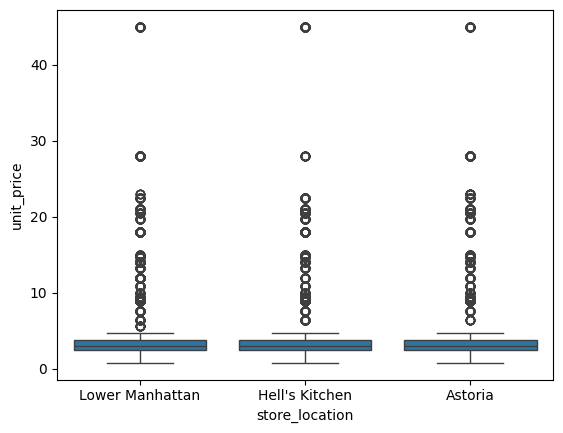

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que coffe_data ya está definido
sns.boxplot(x=coffe_data["store_location"], y=coffe_data["unit_price"])
plt.show()


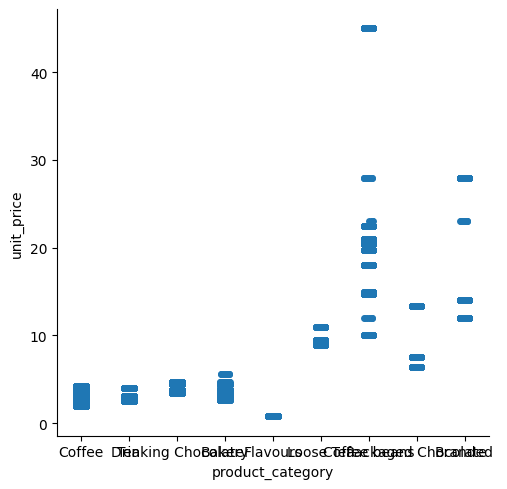

In [ ]:


sns.catplot(x=coffe_data["product_category"], y=coffe_data["unit_price"])



<Axes: xlabel='transaction_qty', ylabel='unit_price'>

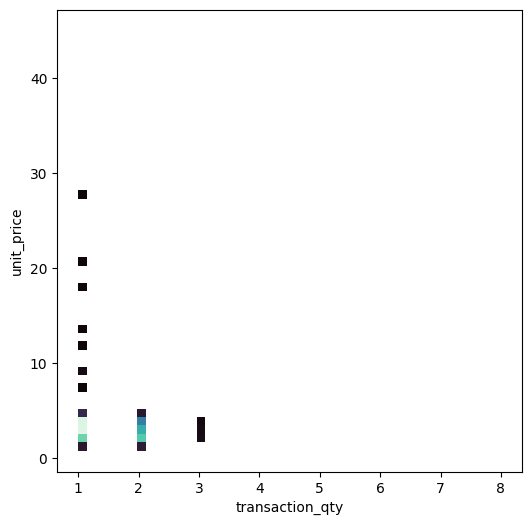

In [ ]:
x=coffe_data["transaction_qty"]
y=coffe_data["unit_price"]
f, ax = plt.subplots(figsize=(6, 6))
#sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.01, cmap="mako")
#sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

https://seaborn.pydata.org/

<Axes: >

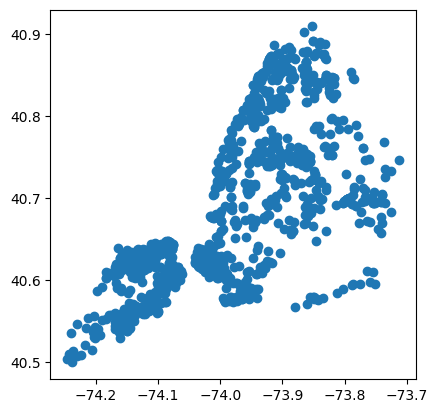

In [ ]:
import geopandas
path_maths=r"/content/drive/MyDrive/PROYECTO HERRAMIENTAS/DCM_StreetNameChanges_Points_20250930.geojson"
sf = geopandas.read_file(path_maths, encoding="utf-8")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cbook import get_sample_data
from matplotlib.cm import cool
from matplotlib.patches import Patch
sf.plot()

CORRELACIÓN

In [ ]:
coffe_data[['transaction_qty','unit_price']].dropna().corr()

,transaction_qty,unit_price
transaction_qty,1.000000,-0.123546
unit_price,-0.123546,1.000000


El análisis de correlación muestra una relación ligeramente negativa (-0.12) entre el precio unitario (unit_price) y la cantidad de transacciones (transaction_qty), lo que indica que, en general, cuando el precio aumenta, la cantidad comprada tiende a disminuir, aunque esta relación es muy débil.

In [ ]:
coffe_data[['transaction_qty','store_id']].dropna().corr()

,transaction_qty,store_id
transaction_qty,1.000000,-0.000794
store_id,-0.000794,1.000000


<Axes: xlabel='transaction_qty', ylabel='store_id'>

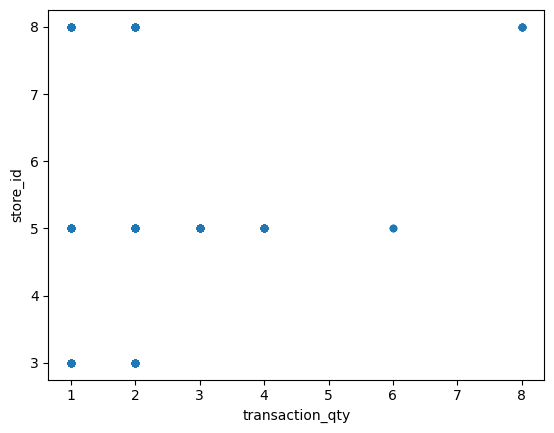

In [ ]:
coffe_data[['transaction_qty','store_id']].dropna().plot.scatter(x='transaction_qty',y='store_id')

El resultado de la correlación entre transaction_qty y store_id muestra un valor de -0.000794, lo que indica una correlación prácticamente nula entre la cantidad de transacciones y el identificador de la tienda. Esto significa que no existe una relación lineal entre el número de productos vendidos y la tienda en la que se realizaron las ventas. En el gráfico de dispersión, los puntos se distribuyen de manera aleatoria y sin un patrón definido, lo que refuerza la idea de que la cantidad de productos vendidos no depende del identificador de la tienda. En otras palabras, todas las tiendas parecen tener comportamientos similares en cuanto al volumen de transacciones, sin que una tienda específica concentre mayores o menores cantidades de venta.

REGRESIÓN

In [ ]:
import pandas as pd
import statsmodels.api as sm
df = coffe_data.copy()
df_dummies = pd.get_dummies(df[['product_type', 'store_location']], drop_first=True)

Y = df['transaction_qty'].astype(float)
X = pd.concat([df[['unit_price']].astype(float), df_dummies.astype(float)], axis=1)

X = sm.add_constant(X)

modelo = sm.OLS(Y, X).fit()

print(modelo.summary())

df['predicciones'] = modelo.predict(X)

print(df[['transaction_qty', 'predicciones']].head())


                            OLS Regression Results                            
Dep. Variable:        transaction_qty   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     787.8
Date:                Tue, 21 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:53:32   Log-Likelihood:            -1.0908e+05
No. Observations:              149116   AIC:                         2.182e+05
Df Residuals:                  149084   BIC:                         2.185e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

INTERPRETACIÓN
INTERPRETACIÓN

Premium Beans: Este producto muestra un impacto positivo y significativo sobre las ventas, lo que indica que cuando aumenta su presencia, las ventas totales crecen. Esto demuestra que los clientes lo perciben como un producto de alta calidad y valor. Una buena estrategia sería promocionar el Premium Beans mediante campañas que resalten su origen y sabor, o incluirlo en combos especiales para incentivar su compra frecuente.

Espresso Blend: El Espresso Blend tiene una relación positiva con las ventas, reflejando una fuerte preferencia por parte de los consumidores. Su intervalo de confianza confirma que contribuye de forma importante al aumento en las transacciones. Para aprovechar esto, se puede impulsar el producto a través de programas de fidelización o descuentos por volumen, fortaleciendo su posición como una opción preferida en la carta.

Mocha Coffee: El Mocha Coffee presenta una relación negativa con las ventas, lo que sugiere que su aceptación entre los clientes es baja. Esto podría deberse a su sabor, precio o competencia con otros tipos de café más populares. Una estrategia útil sería reformular el producto o reposicionarlo con una imagen más atractiva, por ejemplo, una versión con chocolate premium o presentaciones especiales para atraer nuevos consumidores.

Cold Brew: El Cold Brew muestra un coeficiente positivo, pero sin evidencia estadística fuerte, lo que indica que su efecto en las ventas no es concluyente. Aun así, existe una tendencia favorable que podría aprovecharse en determinadas temporadas. Una buena estrategia sería promocionarlo especialmente en épocas de calor o a través de redes sociales, enfocándose en el público joven que busca bebidas frías y modernas.

Bakery Products: Los productos de panadería tienen una relación positiva y significativa con las ventas, lo que evidencia que actúan como un complemento ideal para el café. Cuando se venden juntos, las transacciones aumentan notablemente. La estrategia más efectiva sería crear combos o promociones que combinen café y panadería, incentivando el consumo conjunto y mejorando el ticket promedio por cliente.

**Marco Teórico y Bibliografía**

## 1. Hipótesis del Proyecto

El presente análisis de datos busca validar la siguiente hipótesis, obtenida del proyecto original:

> **Hipotesis:** Los consumidores prefieren los productos de tipo café y realizan la mayor parte de sus compras durante las horas de la mañana.

## 2.¿Se Suporta la Bibliografía con la Hipótesis?

La investigación confirma que el consumo de café se concentra en las mañanas, asociado a sus efectos estimulantes y culturales. La preferencia del consumidor en cafeterías se centra en el producto café, especialmente el de especialidad, aunque existe una tendencia creciente hacia la personalización de las bebidas.

#### A. Consumo de Café y Preferencia por Horas del Día

Esta sección se especializa en revisar si el consumo de café se concentra en las mañanas debido a una combinación de factores **fisiológicos, cognitivos y culturales**. La información justifica la expectativa de un pico de ventas matutino desde los siguientes 3 puntos:

* **Motivación Funcional y Fisiológica:** La evidencia académica subraya que el consumo matutino está impulsado por la necesidad de activación cognitiva y física. La cafeína, como psicoestimulante, aumenta la actividad orgánica y agiliza las funciones mentales, siendo esencial para iniciar las jornadas laborales o académicas. Esta relación funcional establece una razón sólida para que el mayor volumen de transacciones se concentre antes del mediodía.
* **Patrones y Usos Estratégicos:** El consumo se extiende más allá de la primera hora. Aunque el 34% de los estudiantes prefiere las mañanas por activación, el café también se usa estratégicamente a otras horas, como **después del almuerzo*, para contrarrestar la somnolencia postprandial y mantener la atención en tareas prolongadas.
* **Factor Salud y Hábito:** La asociación del consumo matutino con beneficios para la salud, como la reducción de hasta un **31% en el riesgo de muerte cardiovascular**, refuerza la continuidad del hábito. El consumo moderado (2-4 tazas/día) se percibe como seguro y hasta beneficioso.


| Fuente | URL |
| :--- | :--- |
| **Representación del café en la vida estudiantil de los universitarios - ResearchGate** | [https://www.researchgate.net/publication/392086787_Representacion_del_cafe_en_la_vida_estudiantil_de_los_universitarios](https://www.researchgate.net/publication/392086787_Representacion_del_cafe_en_la_vida_estudiantil_de_los_universitarios) |
| **Beber café por la mañana reduce un 31% el riesgo de muerte cardiovascular - Cardio Alianza** | [https://cardioalianza.org/beber-cafe-por-la-manana-reduce-un-31-el-riesgo-de-muerte-cardiovascular/](https://cardioalianza.org/beber-cafe-por-la-manana-reduce-un-31-el-riesgo-de-muerte-cardiovascular/) |
| **CAFÉ, CAFEÍNA VS. SALUD REVISIÓN DE LOS EFECTOS DEL CONSUMO DE CAFÉ EN LA SALUD - SciELO Colombia** | [http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0124-71072010000100017](http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0124-71072010000100017) |
| **Efectos fisiológicos y cognitivos de la cafeína en la infancia - SciELO** | [https://scielo.isciii.es/scielo.php?script=sci_arttext&pid=S2174-51452020000400006](https://scielo.isciii.es/scielo.php?script=sci_arttext&pid=S2174-51452020000400006) |

#### B. Tendencias y Preferencias del Consumidor en Cafeterías (Productos)

 Esta sección aborda el factor "preferencia por el producto café" de la hipótesis, enfatizando que el mercado ya no se enfoca solo en la cafeína, sino en la **calidad del grano y la experiencia a medida**.La tendencia del mercado actual se enfoca en el **café de especialidad**, reforzando la preferencia del consumidor por el producto café de alta calidad sobre otras categorías, sustentado sobre 3 factores que son:

* **Dominio del Café de Especialidad:** El crecimiento notable en el mercado de café de especialidad subraya que los consumidores están dispuestos a pagar un precio superior por productos con atributos organolépticos únicos y trazabilidad. El café de especialidad ha pasado de ser una alternativa a ser la expectativa de calidad para muchos consumidores, lo que valida la importancia de esta categoría sobre otras bebidas.
* **La Experiencia de Personalización:** El cliente busca una bebida que signifique estatus y, más importante aún, que esté "hecha a su medida. Las cafeterías deben ofrecer una variedad de leches alternativas tales como almendra y avena, endulzantes naturales e intensidades de café. La demanda de Latte Art y bebidas "fotogénicas" para redes sociales también forma parte de esta experiencia.
* **La Oferta Completa:** A pesar del dominio del café, la gestión exitosa de una cafetería requiere una oferta variada. Las alternativas como tés, bebidas saludables y cafés descafeinados de alta calidad son esenciales, ya que un buen menú no solo debe satisfacer al amante del café, sino también a aquellos que buscan el ambiente o que tienen restricciones dietéticas.


| Fuente | URL |
| :--- | :--- |
| **10 tendencias de consumo de café para adoptar con éxito en tu negocio - Nestlé Professional** | [https://www.nestleprofessional.com.mx/articulos/tendencias-consumo-cafe](https://www.nestleprofessional.com.mx/articulos/tendencias-consumo-cafe) |
| **Cómo Satisfacer Las Necesidades Actuales Del Cliente en tu Café - Perfect Daily Grind** | [https://perfectdailygrind.com/es/2020/07/03/cómo-satisfacer-las-necesidades-actuales-del-cliente-en-tu-cafe/](https://perfectdailygrind.com/es/2020/07/03/como-satisfacer-las-necesidades-actuales-del-cliente-en-tu-cafe/) |
| **Hábitos y preferencias del consumidor de café especial en el Quindío - Eafit (Tesis)** | [https://repository.eafit.edu.co/bitstream/handle/10784/8555/JaimeOrlando_OspinaValencia_2015.pdf](https://repository.eafit.edu.co/bitstream/handle/10784/8555/JaimeOrlando_OspinaValencia_2015.pdf) |
| **Las necesidades del cliente de cafetería de hoy y cómo satisfacerlas :: Green Plantation** | [https://www.greenplantation.es/a/las-necesidades-del-cliente-de-cafeteria-de_hoy_y_como_satisfacerlas](https://www.greenplantation.es/a/las-necesidades-del-cliente-de-cafeteria-de_hoy_y_como_satisfacerlas) |

***

###  Análisis de la Bibliografía General

#### Relación y Evidencia (Apoyo Sólido a la Hipótesis)

La literatura **valida plenamente la hipótesis** al confirmar los patrones de consumo y preferencia:

* **Pico de Consumo Matutino (Activación):**
    * La mayoría de los estudios asocian la ingesta de café en la mañana con la necesidad de activación física y mental, un factor determinante en entornos de alta demanda.
    * En algunos grupos estudiados, hasta el 34% de los consumidores prefieren tomar café específicamente por las mañanas con este fin.
    * Este hábito está relacionado con el efecto estimulante sobre el sistema nervioso central, que agiliza las funciones mentales y corporales.

* **Dominio de la Categoría Café (Experiencia y Calidad):**
    * Se confirma que el café es la "bebida reina" de la mañana y que la preferencia se ha desplazado hacia el café de especialidad (cafés con cuidados desde la siembra hasta la preparación).
    * Esta tendencia indica que los consumidores no solo buscan la cafeína, sino una **"experiencia" y calidad superior**, estando dispuestos a pagar más por ello.
    * El café también se asocia a rituales y tradiciones, siendo una clase de "generador de conversaciones" y un símbolo de bienvenida en el hogar y trabajo.

* **Contexto de la Salud:**
    * Aunque el consumo excesivo (más de 4 tazas/día) puede generar efectos secundarios como insomnio y ansiedad, el consumo moderado (2-4 tazas/día) está asociado a beneficios para la salud, como la reducción del riesgo de diabetes tipo 2 y una disminución de hasta un 31% en el riesgo de muerte cardiovascular cuando se bebe por la mañana.

#### Brechas y Oportunidades del Análisis

El proyecto y el análisis de datos nos lleva a evidenciar un nivel de evidencia empírica y estratégica específica para nuestro caso:

1.  **Patrón Específico de Producto por Hora:** La literatura es general. El análisis debe detallar qué tipo específico de café (ej. un Americano rápido vs. un Latte elaborado) se compra más en las horas pico de la mañana (ej. 7:00 AM, 9:00 AM o 11:00 AM).
2.  **Cuantificación de la Personalización:** La personalización de uso de productos como se propone (leches alternativas, endulzantes) es una tendencia, pero el análisis de datos cuantificará las modificaciones exactas y su popularidad real en tu contexto, clave para el inventario.
3.  **Venta de Productos No-Café:** Se podría recomendar ofrecer alternativas como tés, bebidas sin cafeína). Tu análisis revelará la **cuota de mercado real** de estas categorías y si sus picos de venta se concentran *fuera* de las horas pico de café, lo cual es útil para la optimización de recursos.